# Светлинская ГЭС-3, генератор ГГ-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Вводные данные для анализа
# Номинальная мощность генераторов, МВт:
Pnom1=107
# Импорт и форматирование csv Поиска СК
df_sk = pd.read_csv('./Svet/Svet_results_data.csv', sep=';', encoding="ansi", decimal=',')
df_sk.columns = ["TimeUTC", 
                 "G1_def", "G1_def_P", "G1_def_Q", "G1_def_P_amp", "G1_def_P_freq","G1_def_Q_amp", "G1_def_Q_freq",
                 "G2_def", "G2_def_P", "G2_def_Q", "G2_def_P_amp", "G2_def_P_freq","G2_def_Q_amp", "G2_def_Q_freq",
                 "G3_def", "G3_def_P", "G3_def_Q", "G3_def_P_amp", "G3_def_P_freq","G3_def_Q_amp", "G3_def_Q_freq"]
df_sk["time"] = ((pd.to_datetime(df_sk["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
# Импорт и форматирование csv СМСР
df_ext = pd.read_csv('./Svet/SMSR_SIG_EXT_data_Svet_1.csv', sep=';', encoding="windows-1251")
# Создаем таблицу diagno с выводом ошибок алгоритма СМСР (берем часть колонок из df_ext)
diagno = df_ext[["osh_ARV1_ext[6]", "osh_ARV1_ext[7]", "osh_ARV1_ext[8]", "osh_ARV1_ext[9]", "osh_ARV1_ext[10]"]]
diagno.columns = ["bug1", "bug2", "bug3", "bug4", "bug5"]
# Создаем таблицу result_osc для вывода расчетов типов данных алгоритма СМСР (берем часть колонок из df_ext)
results = df_ext[["osh_ARV1_ext[{:d}]".format(i) for i in range(11, 25)]]
results.columns = ["osc1_f", "osc1_phi", "osc1_np", "osc2_f", "osc2_phi", "osc2_np", "osc3_f", "osc3_phi", "osc3_np", "osc4_f", "osc4_phi", "osc4_np", "osc5_f", "osc5_amp"]
# Создаем таблицу osh для вывода выходных сигналов алгоритма СМСР (берем часть колонок из df_ext)
osh = df_ext[["osh_ARV1_ext[1]", "osh_ARV1_ext[2]", "osh_ARV1_ext[3]", "osh_ARV1_ext[4]", "osh_ARV1_ext[5]"]]
osh.columns = ["osc1", "osc2", "osc3", "osc4", "osc5"]

C:\Users\das\AppData\Local\Temp\ipykernel_11728\2288307042.py:10: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sk["time"] = ((pd.to_datetime(df_sk["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3
C:\Users\das\AppData\Local\Temp\ipykernel_11728\2288307042.py:10: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sk["time"] = ((pd.to_datetime(df_sk["TimeUTC"]).astype('int64') / 1e6 - float(pd.to_datetime(df_sk["TimeUTC"][0]).to_datetime64()) / 1e6).astype('int64')) / 1e3


Исходные сигналы

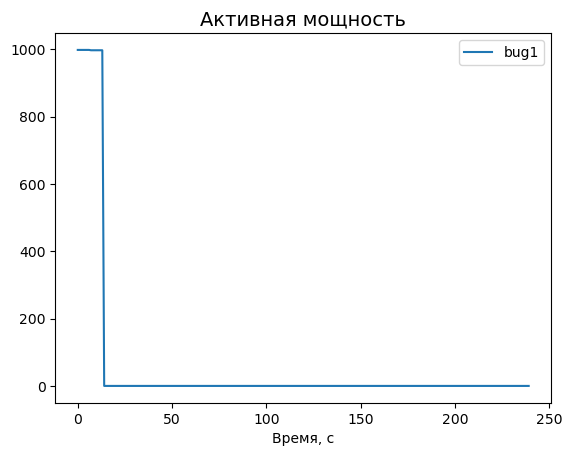

In [3]:
# Активная мощность
plt.title('Активная мощность', fontsize=14)
plt.xlabel('Время, с')
plt.plot(diagno["bug1"], label='bug1')
plt.legend()
plt.show()

Поиск СК - спектрограмма (по активной мощности)
пикча

# Анализ

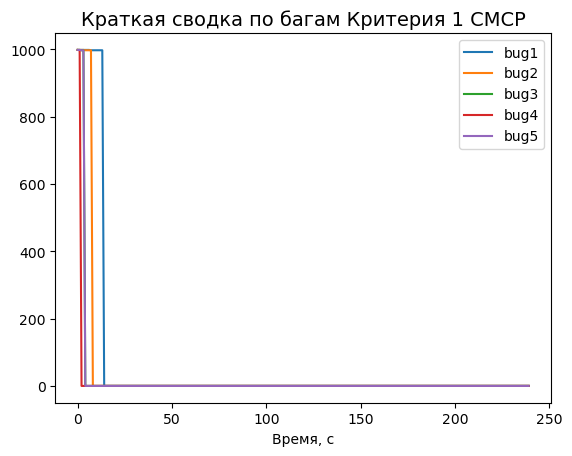

In [4]:
# Краткая сводка по багам Критерия 1
plt.title('Краткая сводка по багам Критерия 1 СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.plot(diagno["bug1"], label='bug1')
plt.plot(diagno["bug2"], label='bug2')
plt.plot(diagno["bug3"], label='bug3')
plt.plot(diagno["bug4"], label='bug4')
plt.plot(diagno["bug5"], label='bug5')
plt.legend()
plt.show()

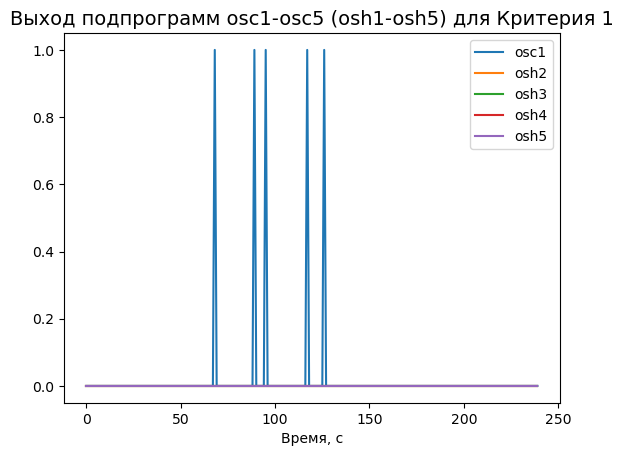

In [5]:
# Выход подпрограмм osc1-osc5 (osh1-osh5) Критерия 1
plt.title('Выход подпрограмм osc1-osc5 (osh1-osh5) для Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(osh["osc1"], label='osc1')
plt.plot(osh["osc2"], label='osh2')
plt.plot(osh["osc3"], label='osh3')
plt.plot(osh["osc4"], label='osh4')
plt.plot(osh["osc5"], label='osh5')
plt.legend()
plt.show()

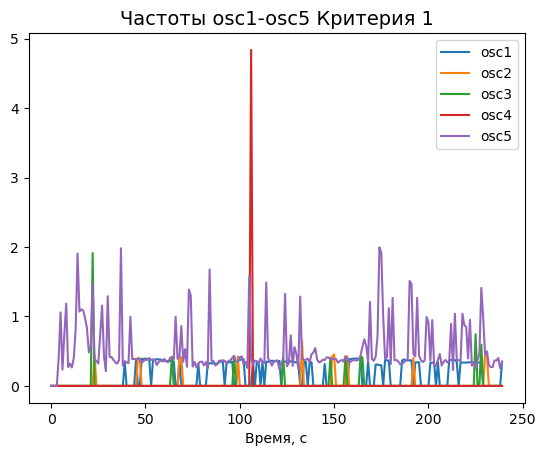

In [6]:
# Частоты osc1-osc5 Критерия 1
plt.title('Частоты osc1-osc5 Критерия 1', fontsize=14)
plt.xlabel('Время, с')
plt.plot(results["osc1_f"], label='osc1')
plt.plot(results["osc2_f"], label='osc2')
plt.plot(results["osc3_f"], label='osc3')
plt.plot(results["osc4_f"], label='osc4')
plt.plot(results["osc5_f"], label='osc5')
plt.legend()
plt.show()

C:\Users\das\AppData\Local\Temp\ipykernel_11728\3900864808.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y1_filled = pd.Series(y1).fillna(method='ffill')


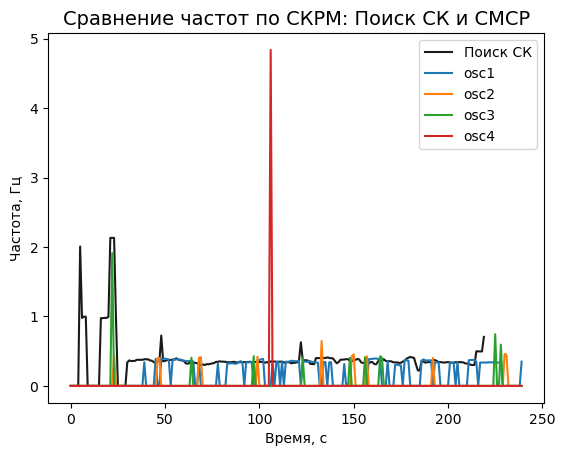

In [7]:
# Поиск СК и СМСР - частота (по реактивной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_P_freq"]
y1_filled = pd.Series(y1).fillna(method='ffill')
y2=results["osc5_f"]
plt.title('Сравнение частот по СКРМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(x,y1_filled,'0.1', label='Поиск СК')
plt.plot(results["osc1_f"], label='osc1')
plt.plot(results["osc2_f"], label='osc2')
plt.plot(results["osc3_f"], label='osc3')
plt.plot(results["osc4_f"], label='osc4')
plt.legend()
plt.show()

C:\Users\das\AppData\Local\Temp\ipykernel_11728\2729482021.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y1_filled = pd.Series(y1).fillna(method='ffill')


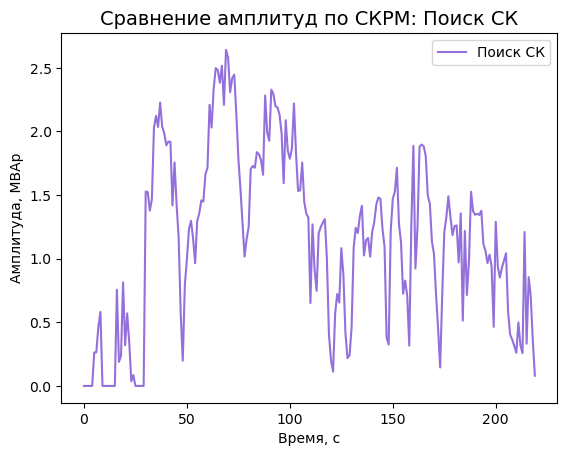

In [8]:
# Поиск СК - амплитуда (по реактивной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_Q_amp"]/1000000
y1_filled = pd.Series(y1).fillna(method='ffill')
plt.title('Сравнение амплитуд по СКРМ: Поиск СК', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВАр')
plt.plot(x,y1_filled,'mediumpurple', label='Поиск СК')
plt.legend()
plt.show()

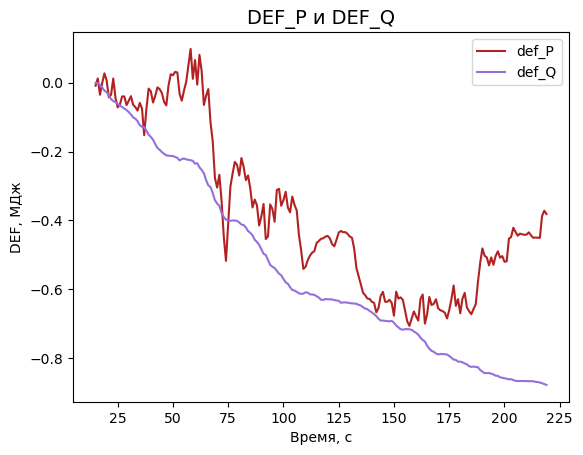

In [9]:
# DEF_P и DEF_Q
x=df_sk["time"]
y1=df_sk["G1_def_P"]/1000000
y2=df_sk["G1_def_Q"]/1000000
plt.title('DEF_P и DEF_Q', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('DEF, МДж')
plt.plot(x,y1,'firebrick',label='def_P')
plt.plot(y2,'mediumpurple',label='def_Q')
plt.legend()
plt.show()

C:\Users\das\AppData\Local\Temp\ipykernel_11728\1811170415.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y1_filled = pd.Series(y1).fillna(method='ffill')


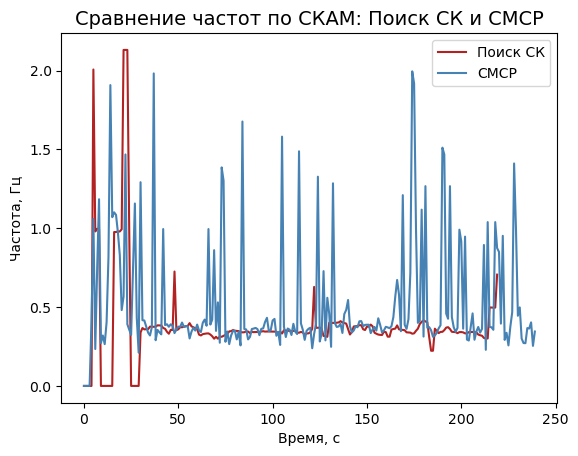

In [10]:
# Поиск СК и СМСР - частота (по активной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_P_freq"]
y1_filled = pd.Series(y1).fillna(method='ffill')
y2=results["osc5_f"]
plt.title('Сравнение частот по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота, Гц')
plt.plot(x,y1_filled,'firebrick', label='Поиск СК')
plt.plot(y2,'steelblue', label='СМСР')
plt.legend()
plt.show()

C:\Users\das\AppData\Local\Temp\ipykernel_11728\1977992034.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y1_filled = pd.Series(y1).fillna(method='ffill')


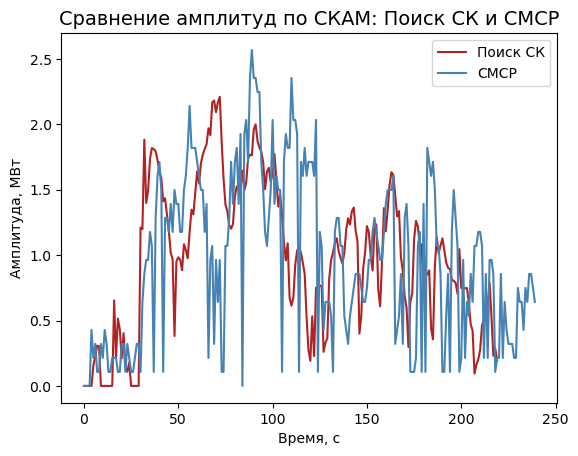

In [11]:
# Поиск СК и СМСР - амплитуда (по активной мощности)
x=df_sk["time"]
y1=df_sk["G1_def_P_amp"]/1000000
y1_filled = pd.Series(y1).fillna(method='ffill')
y2=results["osc5_amp"]*Pnom1
plt.title('Сравнение амплитуд по СКАМ: Поиск СК и СМСР', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, МВт')
plt.plot(x,y1_filled,'firebrick', label='Поиск СК')
plt.plot(y2,'steelblue', label='СМСР')
plt.legend()
plt.show()